# Introduction to Numpy

### Create a numpy array

In [2]:
import numpy as np
a = np.array([[1,2], [3,4]])
print("The shape of array a is:", a.shape)
print("The type of elements in array a:", a.dtype)

The shape of array a is: (2, 2)
The type of elements in array a: int64


In [3]:
# set random seed to guarantee the reproducibility of your code on different devices
np.random.seed(77)
a = np.random.random((3, 4))
print(a)
b = np.random.random((4, 5))
print(b)

[[0.91910903 0.6421956  0.75371223 0.13931457]
 [0.08731955 0.78800206 0.32615094 0.54106782]
 [0.24023518 0.54542293 0.4005545  0.71519189]]
[[0.83667994 0.58848114 0.29615456 0.28101769 0.70559724]
 [0.42259643 0.05731599 0.74702731 0.45231301 0.17577474]
 [0.049377   0.29247534 0.06679913 0.75115649 0.06377152]
 [0.43190832 0.36417241 0.15197153 0.54671034 0.44329304]]


In [4]:
print(a @ b)

[[1.13777683 0.84886317 0.82345515 1.19107987 0.87122512]
 [0.65586142 0.3889841  0.71853264 0.92175969 0.46077403]
 [0.76016924 0.55024079 0.61403806 1.00609413 0.60796441]]


### Basic Operator of Numpy.array
+ sum (broadcast property)
+ matrix product
+ elementwise product (broadcast property)





#### Broadcasting
The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. There are, however, cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation.


![Broadcasting](https://numpy.org/doc/stable/_images/broadcasting_2.png)

In some cases, broadcasting stretches both arrays to form an output array larger than either of the initial arrays.
![Example 2](https://numpy.org/doc/stable/_images/broadcasting_4.png)

# Introduction to Pytorch 

In [5]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

In [6]:
from tensorboardX import SummaryWriter
from torchviz import make_dot

## Torch.Tensor

In [7]:
# define a torch tensor
# even the same random seed in different python package generates different values
torch.manual_seed(77)
a = torch.rand((1000,4))
b = torch.rand((4, 10))
c = torch.rand((10, 50))
d = a @ b @ c
print(d.shape)

torch.Size([1000, 50])


### Convert from `Numpy.array`

In [8]:
np.random.seed(77)
a = np.random.random((3, 4))
print(a)
print(type(a))
print(a.dtype)

print('\n')
# The Torch.tensor has the similar attribute as Numpy.array called `dtype`.
a = torch.tensor(a)
print(a)
print(type(a))
print(a.dtype)


[[0.91910903 0.6421956  0.75371223 0.13931457]
 [0.08731955 0.78800206 0.32615094 0.54106782]
 [0.24023518 0.54542293 0.4005545  0.71519189]]
<class 'numpy.ndarray'>
float64


tensor([[0.9191, 0.6422, 0.7537, 0.1393],
        [0.0873, 0.7880, 0.3262, 0.5411],
        [0.2402, 0.5454, 0.4006, 0.7152]], dtype=torch.float64)
<class 'torch.Tensor'>
torch.float64


### Automatic Differentiation
A tensor can be created with `requires_grad=True` so that `torch.autograd` records operations on them for automatic differentiation.

`torch.autograd` provides classes and functions implementing automatic differentiation of arbitrary scalar valued functions. It requires minimal changes to the existing code - you only need to declare Tensor s for which gradients should be computed with the `requires_grad=True` keyword. As of now, we only support autograd for floating point `Tensor` types ( half, float, double and bfloat16) and complex `Tensor` types (cfloat, cdouble).

|Attribute|Description | 
|-|-|
|`backward`|Computes the sum of gradients of given tensors with respect to graph leaves.|
|`grad`|Computes and returns the sum of gradients of outputs with respect to the inputs.|


In [9]:
x = torch.tensor([[1., -1.], [1., 1.]], requires_grad=True)
out = x.pow(2).sum()
out.backward()
x.grad

tensor([[ 2., -2.],
        [ 2.,  2.]])

## Torch.nn
`Torch.nn` module provides large numbers of operators which are the basic building blocks for graphs.
### Linear Layers

|Name| Explanation |
|-|-|
|[`nn.Identity`](https://pytorch.org/docs/stable/generated/torch.nn.Identity.html#torch.nn.Identity)|A placeholder identity operator that is argument-insensitive.|
|[`nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear)|Applies a linear transformation to the incoming data: $y = x\cdot A^T + b$|
|[`nn.Bilinear`](https://pytorch.org/docs/stable/generated/torch.nn.Bilinear.html#torch.nn.Bilinear)|Applies a bilinear transformation to the incoming data: $y = x_1^TAx_2 + b$ |
|[`nn.LazyLinear`](https://pytorch.org/docs/stable/generated/torch.nn.LazyLinear.html#torch.nn.LazyLinear)|A `torch.nn.Linear` module where *in_features* is inferred.|

### Nonlinear Activations
|Name| Explanation |
|-|-|
|[`nn.ELU`](https://pytorch.org/docs/stable/generated/torch.nn.ELU.html#torch.nn.ELU)|Applies the Exponential Linear Unit (ELU) function, element-wise, as described in the paper: [Fast and Accurate Deep Network Learning by Exponential Linear Units (ELUs)](https://arxiv.org/abs/1511.07289).|
|[`nn.LeakyReLU`](https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html#torch.nn.LeakyReLU)|Applies the element-wise function: $LeakyReLU(X)=\max{(0, x)} + negativeslope * \min{(0, x)}$|
|[`nn.ReLU`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU)|Applies the rectified linear unit function element-wise: $ReLU(x) = (x)^+ = \max{(0, x)}$ |
|[`nn.Sigmoid`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html#torch.nn.Sigmoid)|Applies the element-wise function: $\frac{1}{1  + e^{-x}}$ |
### Normalization Layers
|Name| Explanation |
|-|-|
|[`nn.BatchNorm1d`](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html#torch.nn.BatchNorm1d)|Applies Batch Normalization over a 2D or 3D input as described in the paper Batch Normalization: [`Accelerating Deep Network Training by Reducing Internal Covariate Shift`](https://arxiv.org/abs/1502.03167) .|

### Loss Functions
|Name| Explanation |
|-|-|
|[`nn.L1Loss`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html#torch.nn.L1Loss)|Creates a criterion that measures the mean absolute error (MAE) between each element in the input $x$ and target $y$.|
|[`nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss)|Creates a criterion that measures the mean squared error (squared L2 norm) between each element in the input $x$ and target $y$.|
|[`nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss)|This criterion computes the cross entropy loss between input logits and target.|


## Torch Optimizer
`torch.optim` is a package implementing various optimization algorithms. Most commonly used methods are already supported, and the interface is general enough, so that more sophisticated ones can also be easily integrated in the future.

### How to use an optimizer
To use `torch.optim` you have to construct an optimizer object that will hold the current state and will update the parameters based on the computed gradients.

### Constructing it
To construct an `Optimizer` you have to give it an iterable containing the parameters (all should be `Variable` s) to optimize. Then, you can specify optimizer-specific options such as the learning rate, weight decay, etc.


![optimization](https://cs231n.github.io/assets/nn3/opt2.gif)
![optimization_methods](https://cs231n.github.io/assets/nn3/opt1.gif)

## Example: Use Pytorch as a general optimizer


You can use Pytorch to find the minium or maximum of arbitrarily complex optimization objectives.

x,y range: (120,) (120,)
X Y maps: (120, 120) (120, 120)


/var/folders/vm/f48pwwbn7xg7_9jt5d0tkypm0000gn/T/ipykernel_15549/4115474052.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')


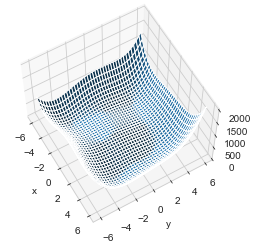

In [31]:
def himmelblau(x):
    return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2

x=np.arange(-6,6,0.1)
y=np.arange(-6,6,0.1)
print('x,y range:',x.shape,y.shape)
X,Y=np.meshgrid(x,y)
print('X Y maps:',X.shape,Y.shape)
Z=himmelblau([X,Y])

fig=plt.figure('himmelblau')
ax=fig.gca(projection='3d')
ax.plot_surface(X,Y,Z)
ax.view_init(60,-30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


In [32]:
x=torch.tensor([0.,0.],requires_grad=True)
optimizer=torch.optim.Adam([x],lr=1e-3)

In [33]:
for step in range(20000):
    pred = himmelblau(x)  # 得到预测值
    optimizer.zero_grad()  # 梯度清零
    pred.backward()  # 计算梯度大小，记录在参数的属性里
    optimizer.step()  # 根据之前定义的优化器更新梯度大小

    if step % 2000 == 0:
        print('step {}: x={}, f(x)={}'
              .format(step, x.tolist(), pred.item()))


step 0: x=[0.0009999999310821295, 0.0009999999310821295], f(x)=170.0
step 2000: x=[2.3331806659698486, 1.9540694952011108], f(x)=13.730916023254395
step 4000: x=[2.9820079803466797, 2.0270984172821045], f(x)=0.014858869835734367
step 6000: x=[2.999983549118042, 2.0000221729278564], f(x)=1.1074007488787174e-08
step 8000: x=[2.9999938011169434, 2.0000083446502686], f(x)=1.5572823031106964e-09
step 10000: x=[2.999997854232788, 2.000002861022949], f(x)=1.8189894035458565e-10
step 12000: x=[2.9999992847442627, 2.0000009536743164], f(x)=1.6370904631912708e-11
step 14000: x=[2.999999761581421, 2.000000238418579], f(x)=1.8189894035458565e-12
step 16000: x=[3.0, 2.0], f(x)=0.0
step 18000: x=[3.0, 2.0], f(x)=0.0


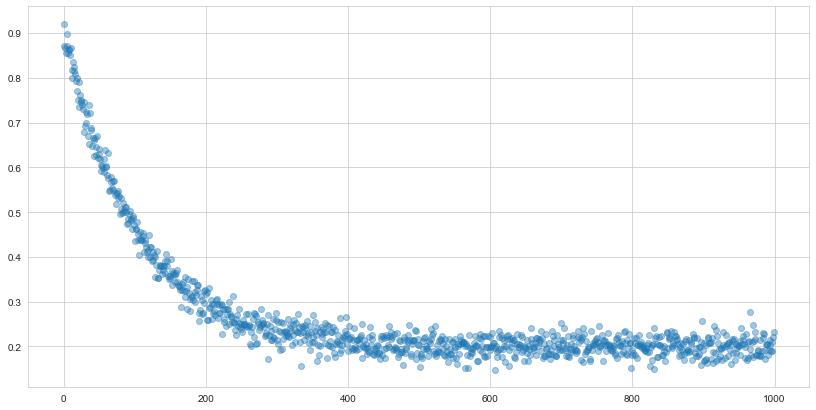

In [24]:
from torch.functional import F
from copy import copy
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
n = 1000
noise = torch.Tensor(np.random.normal(0, 0.02, size=n))
x = torch.arange(n)
a, k, b = 0.7, .01, 0.2
y = a * np.exp(-k * x) + b + noise
plt.figure(figsize=(14, 7))
plt.scatter(x, y, alpha=0.4)

Parameter containing:
tensor([0.6971, 0.0098, 0.1995], requires_grad=True)


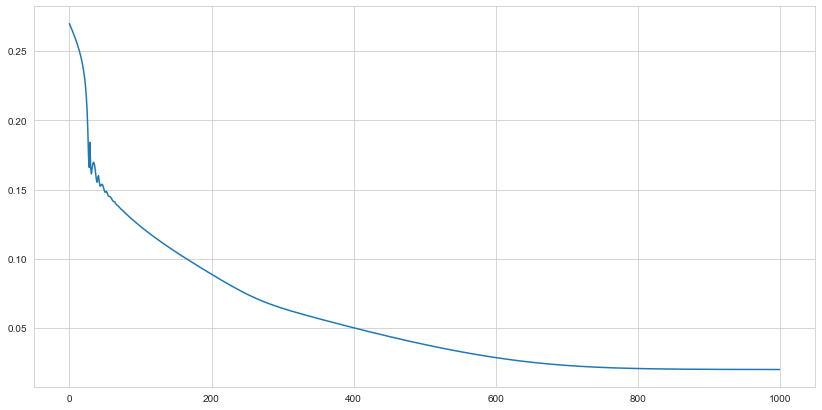

In [30]:
import torch.optim as optim


class Model(nn.Module):
    """Custom Pytorch model for gradient optimization.
    """
    def __init__(self):
        
        super().__init__()
        # initialize weights with random numbers
        weights = torch.distributions.Uniform(0, 0.1).sample((3,))
        # make weights torch parameters
        self.weights = nn.Parameter(weights)        
        
    def forward(self, X):
        """Implement function to be optimised. In this case, an exponential decay
        function (a + exp(-k * X) + b),
        """
        a, k, b = self.weights
        return a * torch.exp(-k * X) + b
    
def training_loop(model, optimizer, n=1000):
    "Training loop for torch model."
    losses = []
    for i in range(n):
        preds = model(x)
        loss = F.mse_loss(preds, y).sqrt()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        losses.append(loss.item())  
    return losses

# instantiate model
m = Model()
# Instantiate optimizer
opt = torch.optim.Adam(m.parameters(), lr=0.001)
losses = training_loop(m, opt)
plt.figure(figsize=(14, 7))

plt.plot(losses)
print(m.weights)

# Create your First Neural Network

In [16]:
x = torch.rand((1000, 4))
y = x.pow(2).sum(1)


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [52]:
class MyModel(nn.Module):
    def __init__(self):
        self.W1 = torch.rand((4,5))
        self.b1 = torch.rand((1000))
        self.W2 = torch.rand(5, 10)
        self.b2 = torch.rand((1000))
    def forward(self, x):
        x = self.W1 @ x + self.b1
        x = self.W2 @ x  + self.b2
        return x
model = MyModel()


# Train your First Model

# Visualize a Deep Neural Network

reference link: https://zhuanlan.zhihu.com/p/232348083

running the following command in your terminal after switch to the `./log` folder.
```
tensorboard --logdir=./ 
```

In [13]:
class modelViz(nn.Module):
    def __init__(self):
        super(modelViz, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, 1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 64, 3, 1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 10, 3, 1, padding=1)
        self.bn3 = nn.BatchNorm2d(10)

    def forward(self, x):
        x = self.bn1(self.conv1(x))
        x = F.relu(x)
        x = self.bn2(self.conv2(x))
        x = F.relu(x)
        x = self.bn3(self.conv3(x))
        x = F.relu(x)
        return x

modelviz = modelViz()
# 创建输入
sampledata = torch.rand(1, 3, 4, 4)
# 看看输出结果对不对
out = modelviz(sampledata)
# print(out)  # 测试有输出，网络没有问题




# 1. 来用tensorflow进行可视化
with SummaryWriter("./log", comment="sample_model_visualization") as sw:
    sw.add_graph(modelviz, sampledata)
torch.save(modelviz, "./log/modelviz.pt")

tensor([[[[0.0000, 0.0000, 0.0000, 0.6836],
          [0.0000, 0.3555, 0.4327, 0.1902],
          [0.0000, 1.1358, 1.7973, 2.0034],
          [0.0000, 0.0000, 0.0000, 0.0000]],

         [[0.0000, 2.1114, 0.0000, 0.3716],
          [0.5349, 0.0000, 0.0000, 2.2730],
          [0.0000, 0.0000, 0.0000, 0.0000],
          [0.2119, 0.0000, 0.1004, 0.2430]],

         [[0.2611, 0.0000, 0.0574, 0.0000],
          [1.0215, 0.0000, 0.0000, 0.1554],
          [0.9703, 1.9999, 0.4493, 0.0000],
          [0.6199, 1.0380, 0.0000, 0.0000]],

         [[0.6803, 0.1997, 0.1155, 0.1446],
          [1.6370, 0.3171, 0.0000, 0.0000],
          [1.2820, 0.8807, 0.9972, 0.0000],
          [0.6175, 0.0000, 0.0000, 0.0000]],

         [[0.2061, 0.0000, 0.0000, 0.0000],
          [0.4912, 1.5697, 0.5438, 0.4003],
          [0.0000, 1.0927, 1.3977, 1.3004],
          [0.0000, 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.2109, 0.4041],
          [1.3927, 0.0000, 0.1822, 0.0000],
          [0.2164, 0.0